In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.0 - Uppvärmning


In [5]:
# load in datas
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

## 1.1 - Movielens full - EDA

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [8]:
# drop timestamp column
ratings.drop(columns='timestamp',inplace=True) 

<AxesSubplot:xlabel='rating', ylabel='Count'>

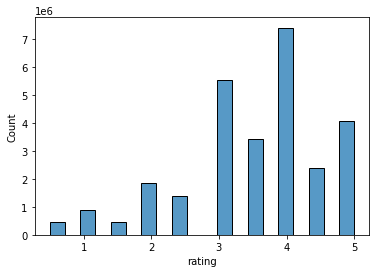

In [9]:
# histgram of rating
sns.histplot(ratings.rating, bins=20)

In [10]:
# merge two data frame with movieId
data = ratings.merge(movies,on='movieId')
data.head()

,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [11]:
ratings.describe()

,userId,movieId,rating
count,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00
std,8.170740e+04,3.510263e+04,1.066353e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,7.117600e+04,1.097000e+03,3.000000e+00
50%,1.420220e+05,2.716000e+03,3.500000e+00
75%,2.124590e+05,7.150000e+03,4.000000e+00
max,2.832280e+05,1.938860e+05,5.000000e+00


In [12]:
# list all the genres

genres=[]

for i in range(len(movies.genres)):
    for genre in movies.genres[i].split("|"):
        if genre not in genres:
            genres.append(genre)

genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'Documentary',
 'War',
 'Musical',
 'Western',
 'Film-Noir',
 '(no genres listed)']

b) Vilka är de 10 filmerna med flest ratings?

In [13]:
ratings_by_title = data.groupby("title").size().sort_values(ascending=False)[:10]
ratings_by_title

title
Shawshank Redemption, The (1994)             97999
Forrest Gump (1994)                          97040
Pulp Fiction (1994)                          92406
Silence of the Lambs, The (1991)             87899
Matrix, The (1999)                           84545
Star Wars: Episode IV - A New Hope (1977)    81815
Jurassic Park (1993)                         76451
Schindler's List (1993)                      71516
Braveheart (1995)                            68803
Toy Story (1995)                             68469
dtype: int64

c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

In [14]:
mean_ratings = data.groupby(['title']).mean() # calculate the mean of ratings
mean_ratings = mean_ratings.loc[ratings_by_title.index] # extract the movie names by "a.index"
mean_ratings


,userId,movieId,rating
title,,,
"Shawshank Redemption, The (1994)",141676.622200,318.0,4.424188
Forrest Gump (1994),142083.137758,356.0,4.056585
Pulp Fiction (1994),141921.386512,296.0,4.173971
"Silence of the Lambs, The (1991)",141652.898179,593.0,4.151412
"Matrix, The (1999)",141924.163250,2571.0,4.149695
Star Wars: Episode IV - A New Hope (1977),141643.320345,260.0,4.120455
Jurassic Park (1993),141858.496292,480.0,3.665034
Schindler's List (1993),141596.401253,527.0,4.257502
Braveheart (1995),141808.180326,110.0,4.008481


d) Gör en plot över årtal och antalet filmer representerade i datasettet.

In [15]:
# Extracting the year from the title
movies['Year'] = movies['title'].str.extract(".*\((.*)\).*")
movies

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '

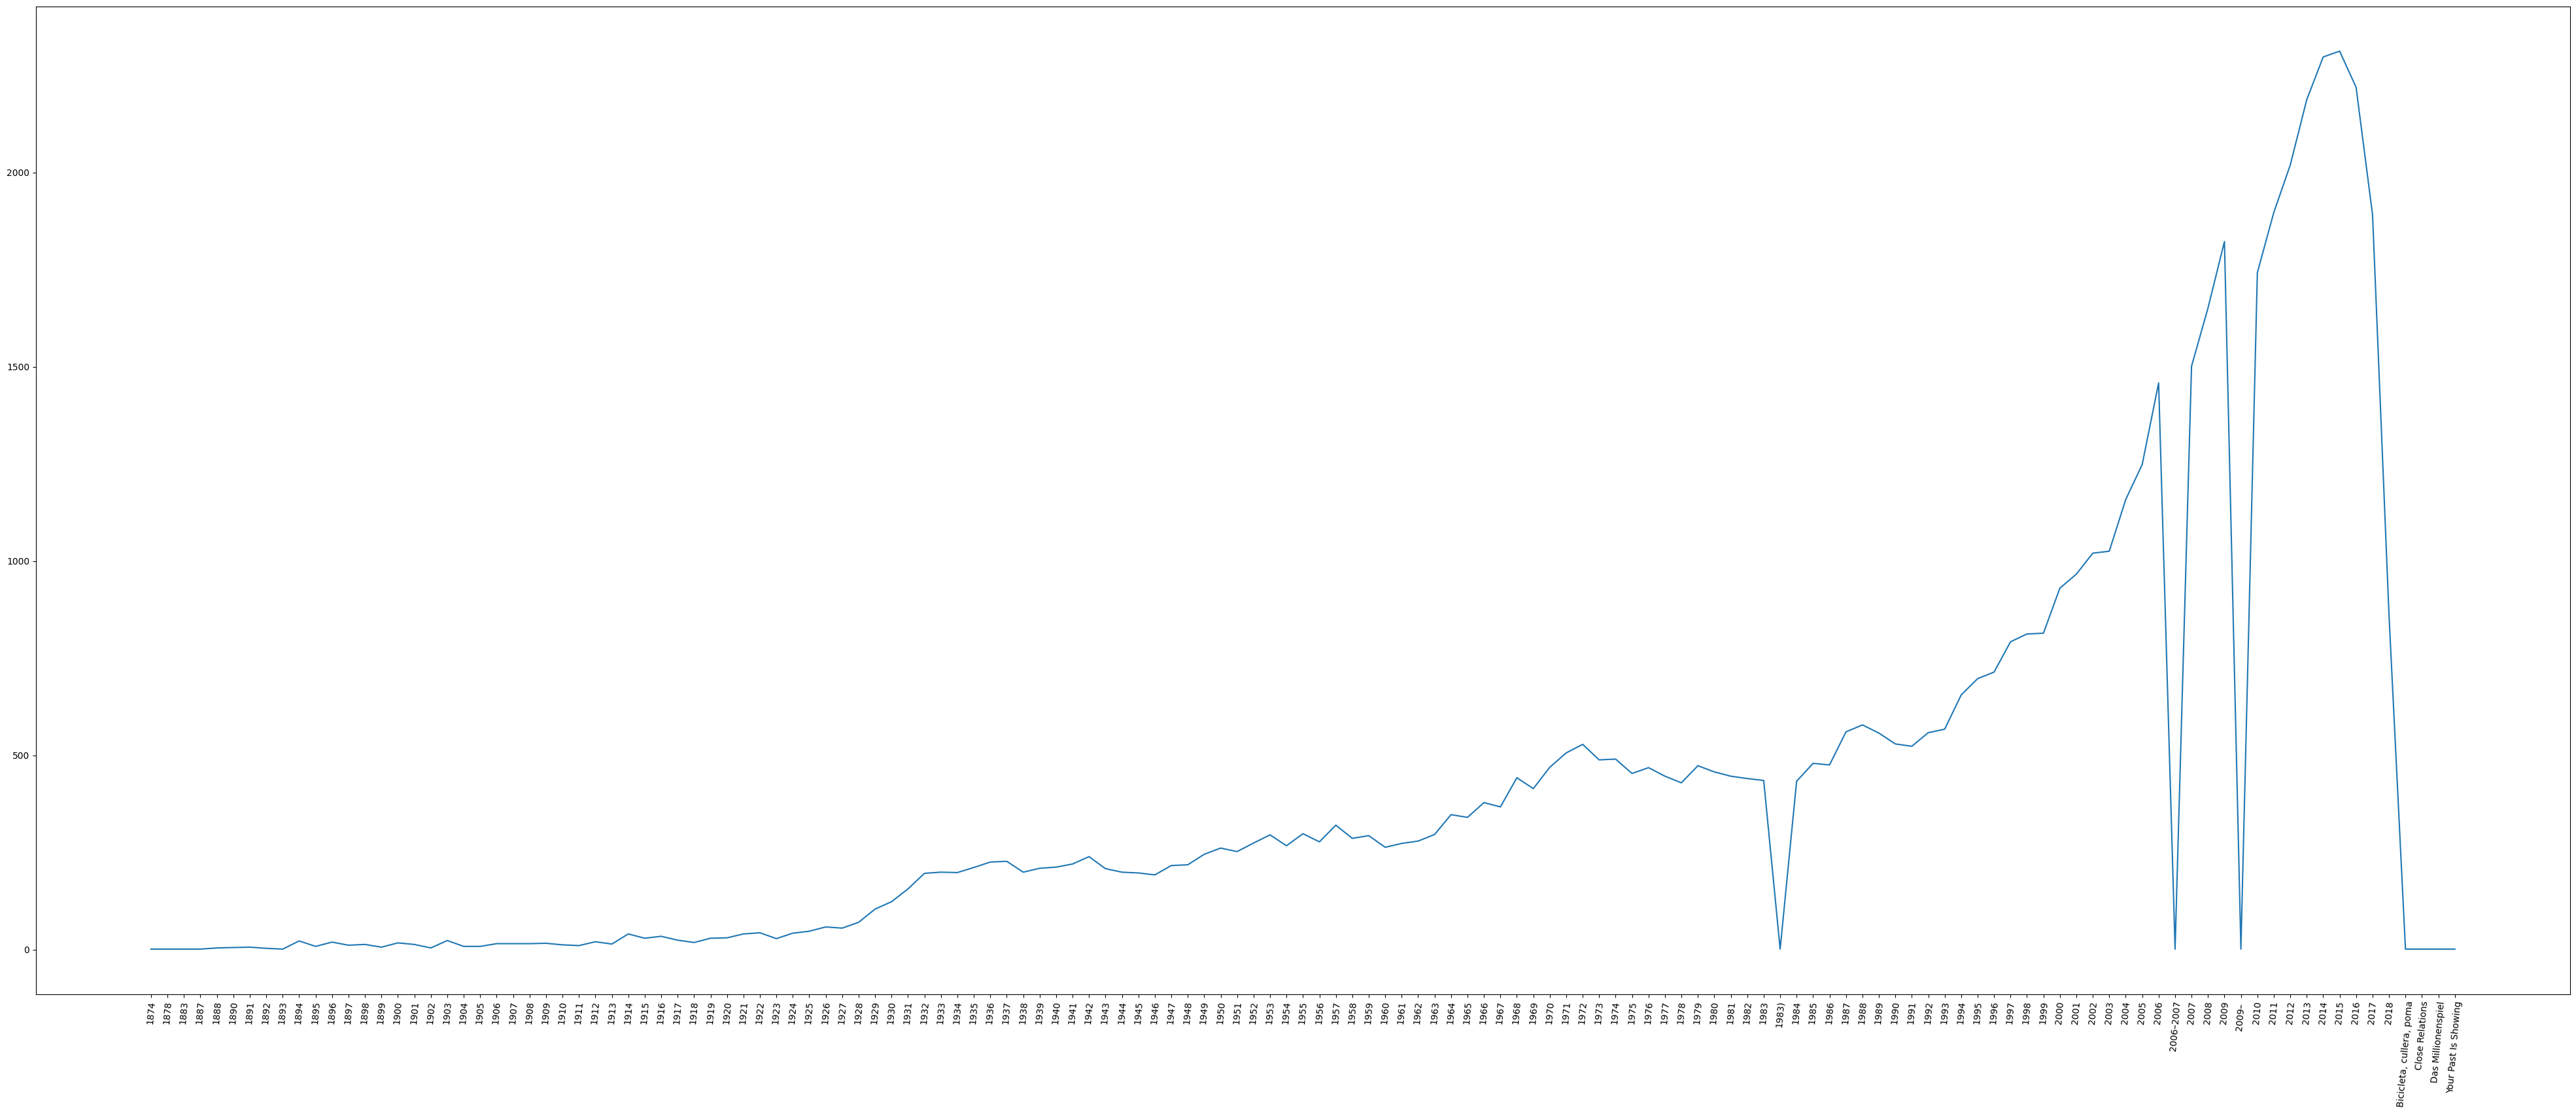

In [16]:
plt.figure(figsize=(50,20), dpi=100)
plt.plot(movies.groupby('Year').title.count())
plt.xticks(rotation=85)

Notice that the gaps on the shape due to unexpected values (t.ex. "2006-2007", "2003-", "2008-")  and 2018 is not fully calculated.

e) Gör en plot över antalet ratings mot movieId.


<AxesSubplot:xlabel='rating', ylabel='movieId'>

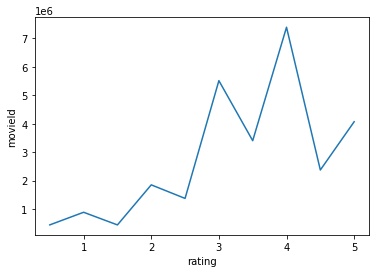

In [17]:
sns.lineplot(data = data.groupby('rating').movieId.count())

f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

<AxesSubplot:xlabel='rating', ylabel='title'>

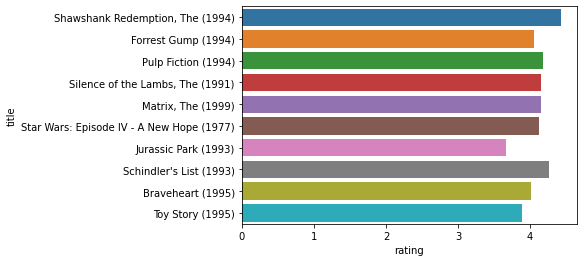

In [18]:
sns.barplot(data=mean_ratings, y=mean_ratings.index, x="rating")

## 1.2 Skapa gles matris 

In [19]:
rating_count = ratings.groupby('movieId', as_index=False).rating.mean()
userId_count = ratings.groupby('movieId', as_index=False).userId.count()
rating_count.describe(), userId_count.describe()

(             movieId        rating
 count   53889.000000  53889.000000
 mean   109110.137950      3.068593
 std     60910.551686      0.736242
 min         1.000000      0.500000
 25%     66310.000000      2.687500
 50%    123105.000000      3.156250
 75%    160770.000000      3.500000
 max    193886.000000      5.000000,
              movieId        userId
 count   53889.000000  53889.000000
 mean   109110.137950    515.011301
 std     60910.551686   2934.758939
 min         1.000000      1.000000
 25%     66310.000000      2.000000
 50%    123105.000000      7.000000
 75%    160770.000000     48.000000
 max    193886.000000  97999.000000)

My principles for recommending movies are: quality movies + popular movies

Discussions:
- From rating_count we can see that minst 25% of movies below 3 points (mean rating = 3 ; people do not like bad movies, so they are not our recommendations )
- From userId_count we can see that minst 75% users rate less than 50 movies (which the mean is 515 movies). I decide to delete them as well because they are not popular.

In [20]:
# Keep the movies which > 50 ratings
more_ratings_movies = userId_count[userId_count["userId"] > 50]
more_ratings_movies

,movieId,userId
0,1,68469
1,2,27143
2,3,15585
3,4,2989
4,5,15474
...,...,...
52935,191351,110
52943,191367,51
53082,191799,100
53277,192283,110


In [21]:
# Keep the movies which > 3 rating points
high_rating_movies = rating_count[rating_count["rating"] >= 3]
high_rating_movies

,movieId,rating
0,1,3.886649
1,2,3.246583
2,3,3.173981
4,5,3.077291
5,6,3.844211
...,...,...
53881,193870,3.000000
53882,193872,4.000000
53883,193874,5.000000
53884,193876,3.000000


In [22]:
# I would like to select the movies that both ratings > 50 and rating points >= 3
movies_selected = pd.merge(more_ratings_movies, high_rating_movies).reindex()
movies_selected

,movieId,userId,rating
0,1,68469,3.886649
1,2,27143,3.246583
2,3,15585,3.173981
3,5,15474,3.077291
4,6,28683,3.844211
...,...,...,...
9924,189783,59,3.483051
9925,189873,58,3.586207
9926,190089,53,3.820755
9927,191351,110,3.463636


In [23]:
movies_selected_pivot = movies_selected.pivot(index="movieId", columns="userId", values="rating").fillna(0)
movies_selected_pivot

userId,51,52,53,54,55,56,57,58,59,60,...,68469,68803,71516,76451,81815,84545,87899,92406,97040,97999
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,3.886649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189783,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,3.483051,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189873,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.586207,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190089,0.0,0.0,3.820755,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Create sparse matrix
from scipy.sparse import csr_matrix

movies_selected_sparse = csr_matrix(movies_selected_pivot.values)
movies_selected_sparse

<9929x3457 sparse matrix of type '<class 'numpy.float64'>'
	with 9929 stored elements in Compressed Sparse Row format>

In [25]:
print(movies_selected_sparse)

  (0, 3447)	3.8866494325899312
  (1, 3326)	3.246582912721512
  (2, 3122)	3.173981392364453
  (3, 3115)	3.0772909396406876
  (4, 3337)	3.8442108566049575
  (5, 3108)	3.371348277890334
  (6, 1258)	3.122482131254061
  (7, 2204)	3.007529781973477
  (8, 3368)	3.431632714743396
  (9, 3224)	3.660277594183741
  (10, 1492)	3.3396516393442623
  (11, 2549)	3.4289997075168177
  (12, 3249)	3.8023623907394284
  (13, 3291)	3.9501262626262625
  (14, 2484)	3.41207034372502
  (15, 3305)	3.5683684190046305
  (16, 2915)	3.301140445402299
  (17, 2277)	3.158796961609526
  (18, 2759)	3.1793058426721794
  (19, 3295)	3.6667605973994606
  (20, 1880)	3.6101387054161163
  (21, 1454)	3.425106609808102
  (22, 1992)	4.036360981308412
  (23, 2830)	3.9187948922585796
  (24, 1140)	3.6366642174871417
  :	:
  (9904, 50)	3.603960396039604
  (9905, 773)	3.8623103850641773
  (9906, 1313)	3.838946723821188
  (9907, 453)	3.4643564356435643
  (9908, 66)	3.0427350427350426
  (9909, 71)	3.487704918032787
  (9910, 32)	4.132530120

In [33]:
# create the movie titles by covering the movie list we selected
movies_selected_with_title = movies.loc[movies["movieId"].isin(movies_selected["movieId"])].reset_index(drop=True)
movies_selected_with_title

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,5,Father of the Bride Part II (1995),Comedy,1995
4,6,Heat (1995),Action|Crime|Thriller,1995
...,...,...,...,...
9924,189783,Christopher Robin (2018),Adventure|Animation|Comedy,2018
9925,189873,Bao (2018),Animation,2018
9926,190089,Hannah Gadsby: Nanette (2018),Comedy,2018
9927,191351,To All the Boys I've Loved Before (2018),Comedy|Romance,2018


## 1.3 Rekommenderarsystemet

Skapa rekommenderarsystemet med KNN och låt systemet ta input från användaren och skriva ut top 5
rekommenderade filmerna, baserat på användarens sökquery. Notera att det inte gör något för den här
labben om du tycker rekommendationerna är helt felaktiga, det här systemet vi bygger är alldeles för enkelt.
- a) Beskriv med ord hur ditt system fungerar.
- b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte
källhänvisa.


In [45]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
# we use here cosine similarity theory to find out the relations between different movie vectors
# the cosine values will be the percentage of similarity

In [49]:
from fuzzywuzzy import process

def recommendations(movie_name, data, model, n_recommendations):
    """
    make n movie recommendations

    movie_name: str, name of input movie
    n_recommendations: int, n recommendations

    """

    model.fit(data)
    
    idx = process.extractOne(movie_name, movies_selected_with_title["title"])[2] # A fuzzy string matching tool for searching
    
    print("Movie selected: ", movies_selected_with_title["title"][idx], "Index: ", idx)
    print("Searching...")
    print("Here is the movie list of recommendations: ")

    distances, indices = model.kneighbors(data[idx], n_neighbors = n_recommendations+1)

    # take ut the movies to the list
    for i in indices: 
        print(movies_selected_with_title["title"][i].where(i != idx))
    

In [50]:
recommendations("star wars", movies_selected_sparse, model_knn, 5)

Movie selected:  Star Wars: Episode IV - A New Hope (1977) Index:  184
Searching...
Here is the movie list of recommendations: 
184                                                   NaN
6620    Sweeney Todd: The Demon Barber of Fleet Street...
6621            National Treasure: Book of Secrets (2007)
6618                                         Vitus (2006)
6619                                      Longford (2006)
6617                    Wristcutters: A Love Story (2006)
Name: title, dtype: object


In [53]:
recommendations("spider man", movies_selected_sparse, model_knn, 10)

Movie selected:  Spider-Man (2002) Index:  3319
Searching...
Here is the movie list of recommendations: 
3319                                                  NaN
6621            National Treasure: Book of Secrets (2007)
6623                          Charlie Wilson's War (2007)
6616                                Go-Getter, The (2007)
6617                    Wristcutters: A Love Story (2006)
6618                                         Vitus (2006)
6619                                      Longford (2006)
6620    Sweeney Todd: The Demon Barber of Fleet Street...
6614                      Deaths of Ian Stone, The (2007)
6622                           There Will Be Blood (2007)
6626                           Great Debaters, The (2007)
Name: title, dtype: object


#### referece to https://www.youtube.com/watch?v=4Ws0oPH350U&t=395s